# **Problem 1: Perceptron and Adaline Neural Units**

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix 
import seaborn as sns
from sklearn.svm import SVC

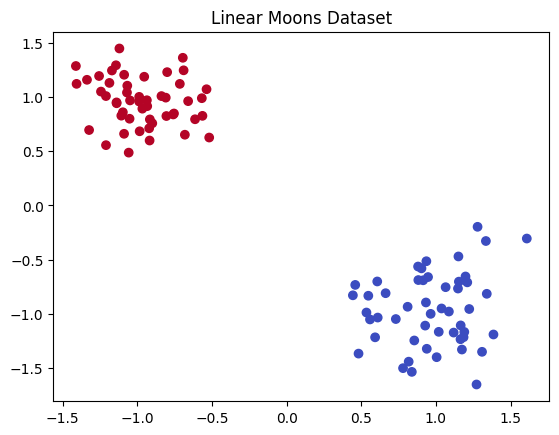

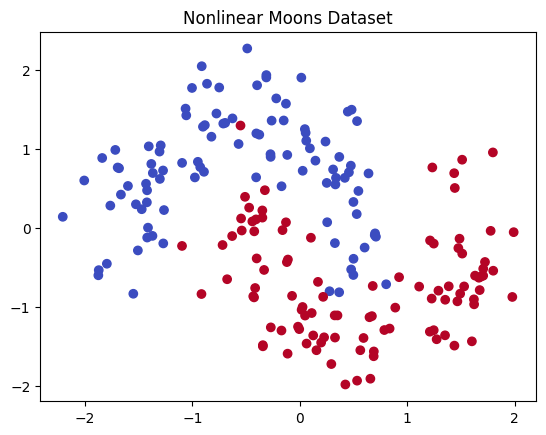

In [62]:
def generate_linear_data():
    X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2,
        center_box = (0, 10))
    return X, y

def generate_nonlinear_data():
    X, y = make_moons(n_samples = 200, noise = 0.2, random_state = 42)
    return X, y

X_linear, y_linear = generate_linear_data()
X_nonlinear, y_nonlinear = generate_nonlinear_data()

scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)
X_nonlinear = scaler.fit_transform(X_nonlinear)

plt.scatter(X_linear[:, 0], X_linear[:, 1], c = y_linear , cmap = 'coolwarm')
plt.title('Linear Moons Dataset')
plt.show()

plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c = y_nonlinear , cmap = 'coolwarm')
plt.title('Nonlinear Moons Dataset')
plt.show()

# Question 1

In [ ]:
X = X_linear
y = y_linear

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

Perceptron Model for Linear dataset

Epoch [100/1000], Loss: 0.4949, Validation Loss: 0.5645
Epoch [200/1000], Loss: 0.3085, Validation Loss: 0.3565
Epoch [300/1000], Loss: 0.2184, Validation Loss: 0.2546
Epoch [400/1000], Loss: 0.1675, Validation Loss: 0.1966
Epoch [500/1000], Loss: 0.1353, Validation Loss: 0.1598
Epoch [600/1000], Loss: 0.1134, Validation Loss: 0.1346
Epoch [700/1000], Loss: 0.0975, Validation Loss: 0.1164
Epoch [800/1000], Loss: 0.0855, Validation Loss: 0.1025
Epoch [900/1000], Loss: 0.0761, Validation Loss: 0.0917
Epoch [1000/1000], Loss: 0.0686, Validation Loss: 0.0830


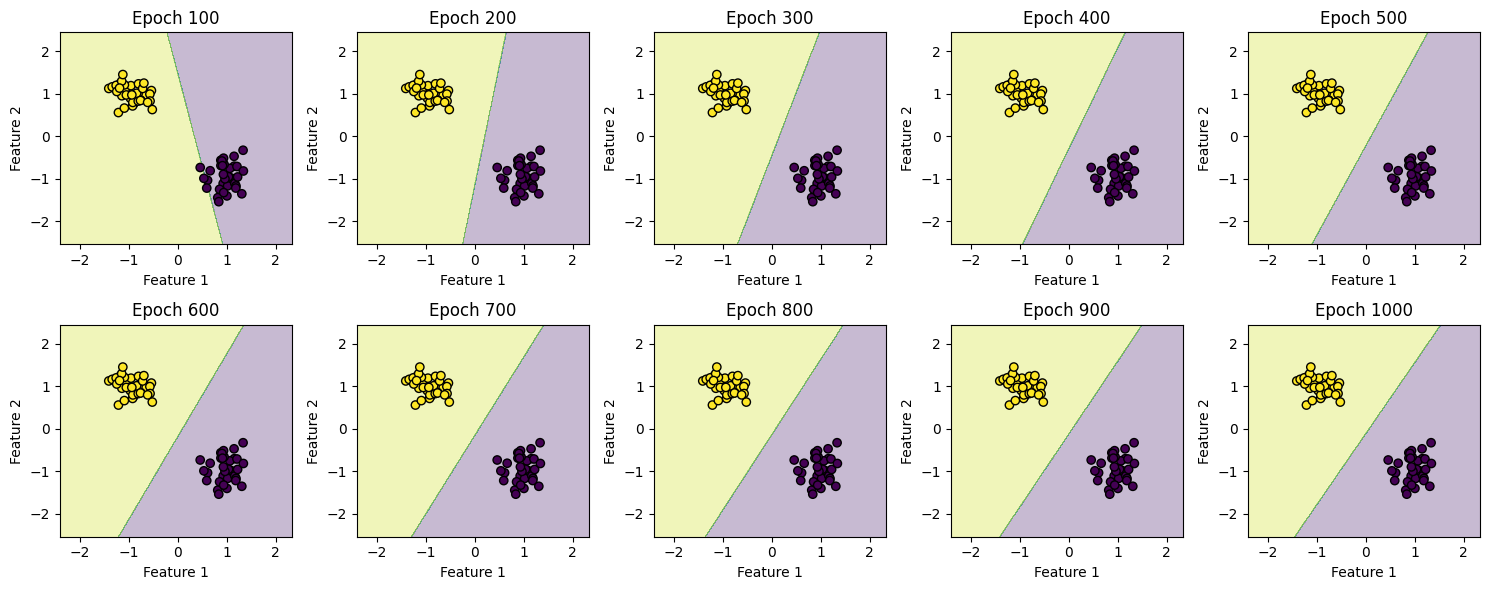

Test Accuracy: 100.00%
Test Recall: 100.00%


In [ ]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  

    def forward(self, x):
        return torch.sigmoid(self.fc(x))  
    
def plot_decision_boundary(X, y, model, ax, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid).detach().numpy()
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Epoch {epoch}')

def train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=1000):
    train_losses, val_losses = [], []
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for epoch in range(epochs):
        model.train()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor).squeeze()
            val_loss = criterion(val_outputs, y_val_tensor)
            val_losses.append(val_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')
            ax = axes[(epoch + 1) // 100 - 1]
            plot_decision_boundary(X_train, y_train, model, ax, epoch + 1)

    plt.tight_layout()
    plt.show()
    return train_losses, val_losses

def evaluate_model(model, X_tensor, y_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor).squeeze()
        predictions = (outputs > 0.5).float()
        accuracy = accuracy_score(y_tensor, predictions)
        recall = recall_score(y_tensor, predictions)
    return accuracy, recall

model = Perceptron()
criterion = nn.BCELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_losses, val_losses = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

test_accuracy, test_recall = evaluate_model(model, X_test_tensor, y_test_tensor)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')

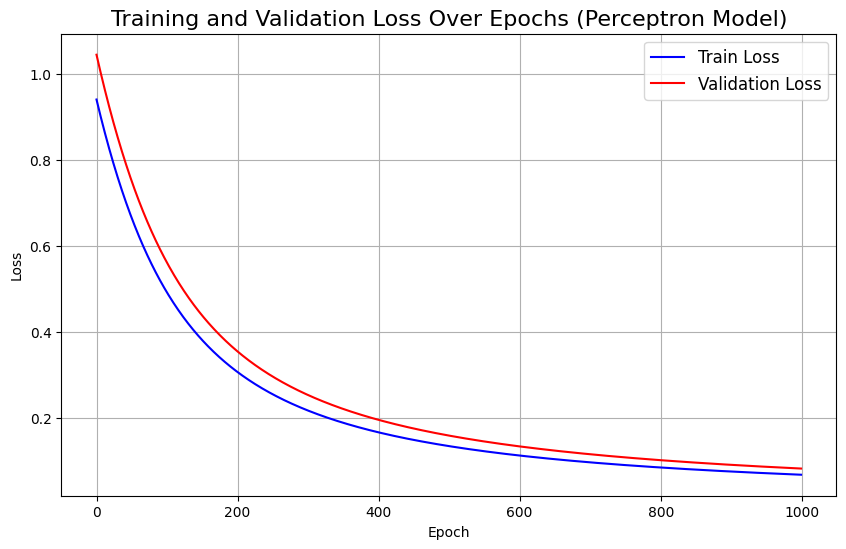

In [ ]:
# Display of Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs (Perceptron Model)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

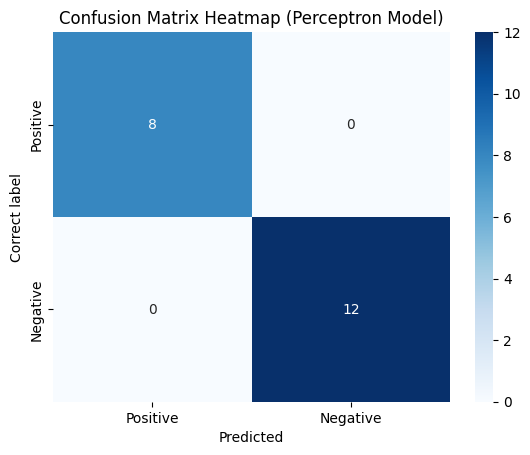

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = (test_outputs > 0.5).float()

    conf_matrix_1 = confusion_matrix(y_test, test_predictions.numpy())

    sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.title("Confusion Matrix Heatmap (Perceptron Model)")
    plt.xlabel("Predicted")
    plt.ylabel("Correct label")
    plt.show()

Adaline Model for Linear dataset

Epoch [100/1000], Loss: 0.0088, Validation Loss: 0.0103
Epoch [200/1000], Loss: 0.0081, Validation Loss: 0.0110
Epoch [300/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [400/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [500/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [600/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [700/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [800/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [900/1000], Loss: 0.0081, Validation Loss: 0.0112
Epoch [1000/1000], Loss: 0.0081, Validation Loss: 0.0112


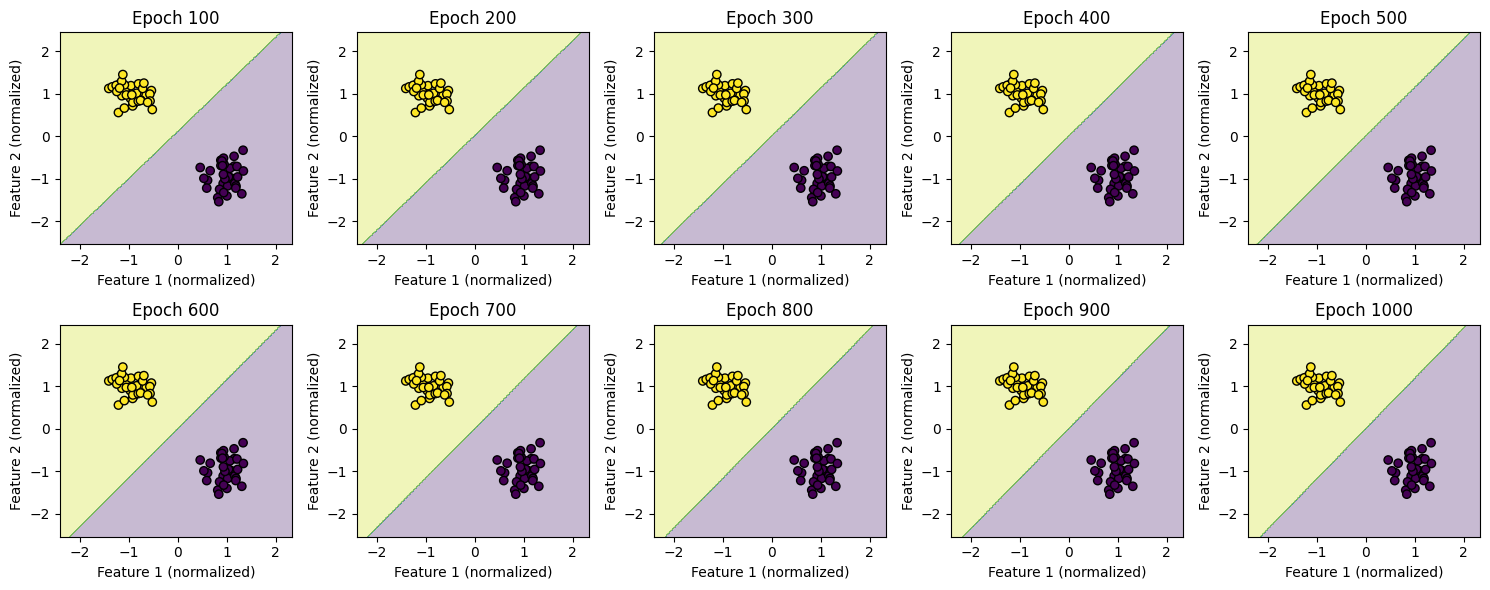

Test Accuracy: 100.00%
Test Recall: 100.00%


In [ ]:
class Adaline(nn.Module):
    def __init__(self):
        super(Adaline, self).__init__()
        self.fc = nn.Linear(2, 1)  

    def forward(self, x):
        return self.fc(x)  

def plot_decision_boundary(X, y, model, ax, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid).detach().numpy()
    Z = (Z > 0.5).astype(int) 
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Feature 1 (normalized)')
    ax.set_ylabel('Feature 2 (normalized)')
    ax.set_title(f'Epoch {epoch}')

def train_and_plot(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor, epochs=1000):
    train_loss, val_loss = [], [] 

    model = Adaline()
    criterion = nn.MSELoss()  
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for epoch in range(epochs):
        model.train()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor).squeeze()
            val_loss_value = criterion(val_outputs, y_val_tensor.float()).item()
            val_loss.append(val_loss_value)

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss_value:.4f}')
            plot_decision_boundary(X_train_tensor.numpy(), y_train_tensor.numpy(), model, axes[(epoch + 1) // 100 - 1], epoch + 1)

    plt.tight_layout()
    plt.show()

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        test_predictions = (test_outputs > 0.5).float()
        
        accuracy = accuracy_score(y_test_tensor, test_predictions)
        recall = recall_score(y_test_tensor, test_predictions)
        print(f'Test Accuracy: {accuracy * 100:.2f}%')
        print(f'Test Recall: {recall * 100:.2f}%')

    return train_loss, val_loss  

train_loss, val_loss = train_and_plot(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor)

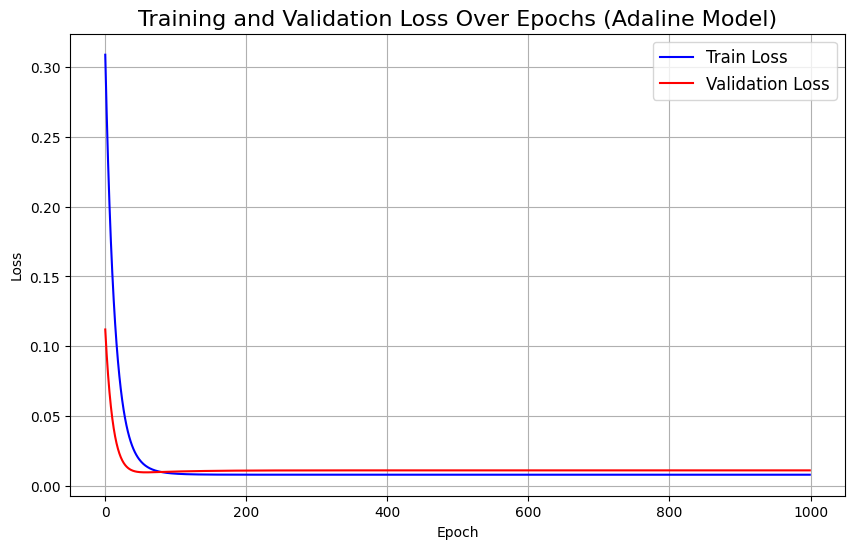

In [ ]:
# Display of Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss', color='blue')  
plt.plot(val_loss, label='Validation Loss', color='red')  
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs (Adaline Model)', fontsize=16)  
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

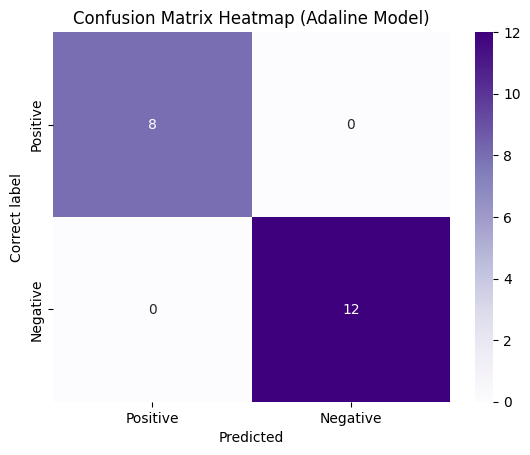

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()  
    test_predictions = (test_outputs > 0.5).float()  

    conf_matrix_2 = confusion_matrix(y_test_tensor.numpy(), test_predictions.numpy())

    sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Purples", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.title("Confusion Matrix Heatmap (Adaline Model)")
    plt.xlabel("Predicted")
    plt.ylabel("Correct label")
    plt.show()

# Question 2

In [ ]:
X = X_nonlinear
y = y_nonlinear

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

Perceptron Model for Nonlinear dataset

Epoch [100/1000], Loss: 0.4890, Validation Loss: 0.5224
Epoch [200/1000], Loss: 0.4279, Validation Loss: 0.4765
Epoch [300/1000], Loss: 0.3905, Validation Loss: 0.4518
Epoch [400/1000], Loss: 0.3661, Validation Loss: 0.4381
Epoch [500/1000], Loss: 0.3493, Validation Loss: 0.4305
Epoch [600/1000], Loss: 0.3372, Validation Loss: 0.4265
Epoch [700/1000], Loss: 0.3282, Validation Loss: 0.4246
Epoch [800/1000], Loss: 0.3213, Validation Loss: 0.4241
Epoch [900/1000], Loss: 0.3159, Validation Loss: 0.4245
Epoch [1000/1000], Loss: 0.3116, Validation Loss: 0.4254


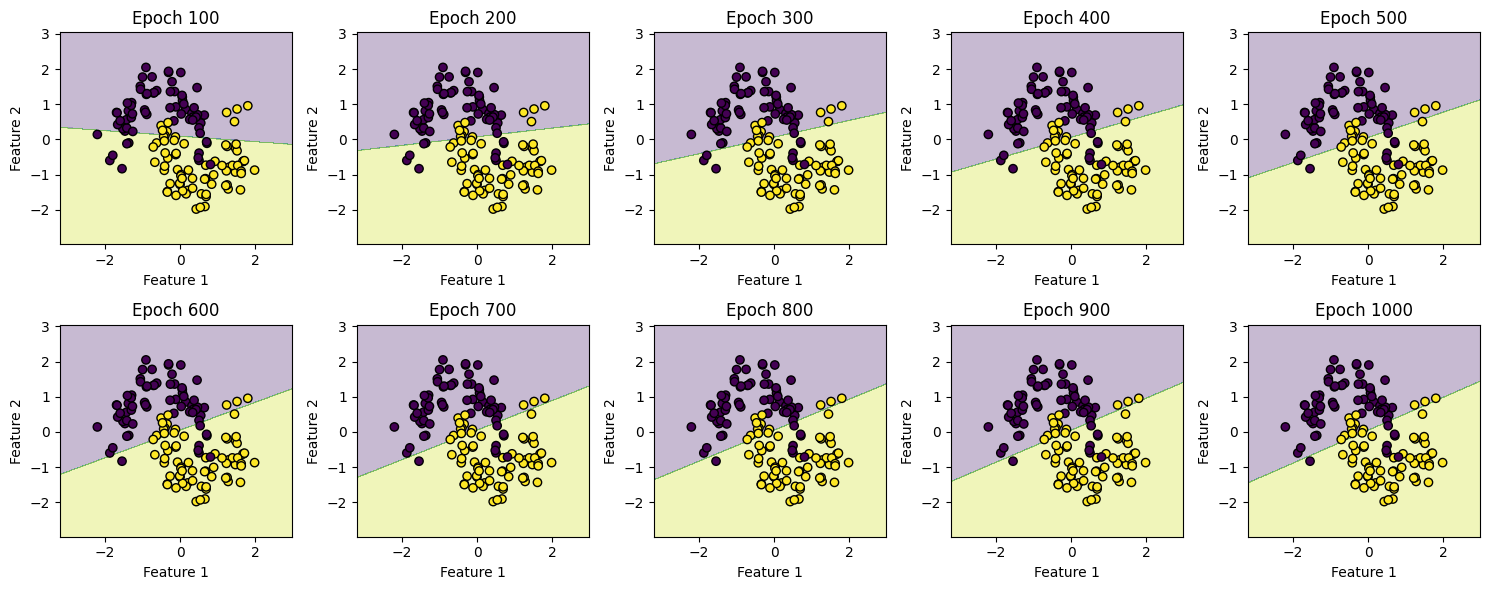

Test Accuracy: 85.00%
Test Recall: 77.78%


In [ ]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  

    def forward(self, x):
        return torch.sigmoid(self.fc(x))  

def plot_decision_boundary(X, y, model, ax, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid).detach().numpy()
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Epoch {epoch}')

def train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=1000):
    train_losses, val_losses = [], []
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for epoch in range(epochs):
        model.train()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor).squeeze()
            val_loss = criterion(val_outputs, y_val_tensor)
            val_losses.append(val_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')
            ax = axes[(epoch + 1) // 100 - 1]
            plot_decision_boundary(X_train, y_train, model, ax, epoch + 1)

    plt.tight_layout()
    plt.show()
    return train_losses, val_losses

def evaluate_model(model, X_tensor, y_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor).squeeze()
        predictions = (outputs > 0.5).float()
        accuracy = accuracy_score(y_tensor, predictions)
        recall = recall_score(y_tensor, predictions)
    return accuracy, recall

model = Perceptron()
criterion = nn.BCELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_losses, val_losses = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)

test_accuracy, test_recall = evaluate_model(model, X_test_tensor, y_test_tensor)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')

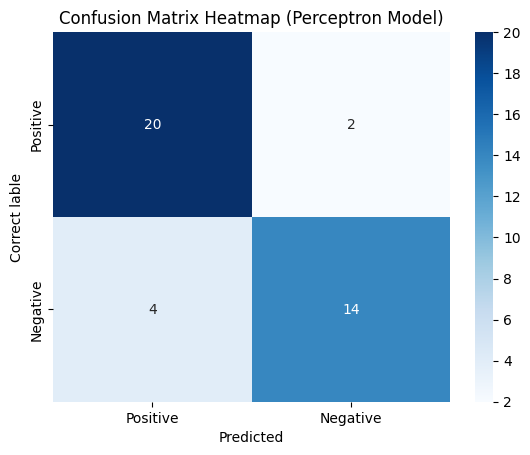

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()  
    test_predictions = (test_outputs > 0.5).float() 

    conf_matrix_3 = confusion_matrix(y_test_tensor, test_predictions)

    sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.title("Confusion Matrix Heatmap (Perceptron Model)")
    plt.xlabel("Predicted")
    plt.ylabel("Correct lable")
    plt.show()

Adaline Model for Nonlinear dataset

Epoch [100/1000], Loss: 0.1102, Validation Loss: 0.1467
Epoch [200/1000], Loss: 0.0977, Validation Loss: 0.1370
Epoch [300/1000], Loss: 0.0967, Validation Loss: 0.1352
Epoch [400/1000], Loss: 0.0966, Validation Loss: 0.1347
Epoch [500/1000], Loss: 0.0966, Validation Loss: 0.1346
Epoch [600/1000], Loss: 0.0966, Validation Loss: 0.1346
Epoch [700/1000], Loss: 0.0966, Validation Loss: 0.1346
Epoch [800/1000], Loss: 0.0966, Validation Loss: 0.1346
Epoch [900/1000], Loss: 0.0966, Validation Loss: 0.1346
Epoch [1000/1000], Loss: 0.0966, Validation Loss: 0.1346


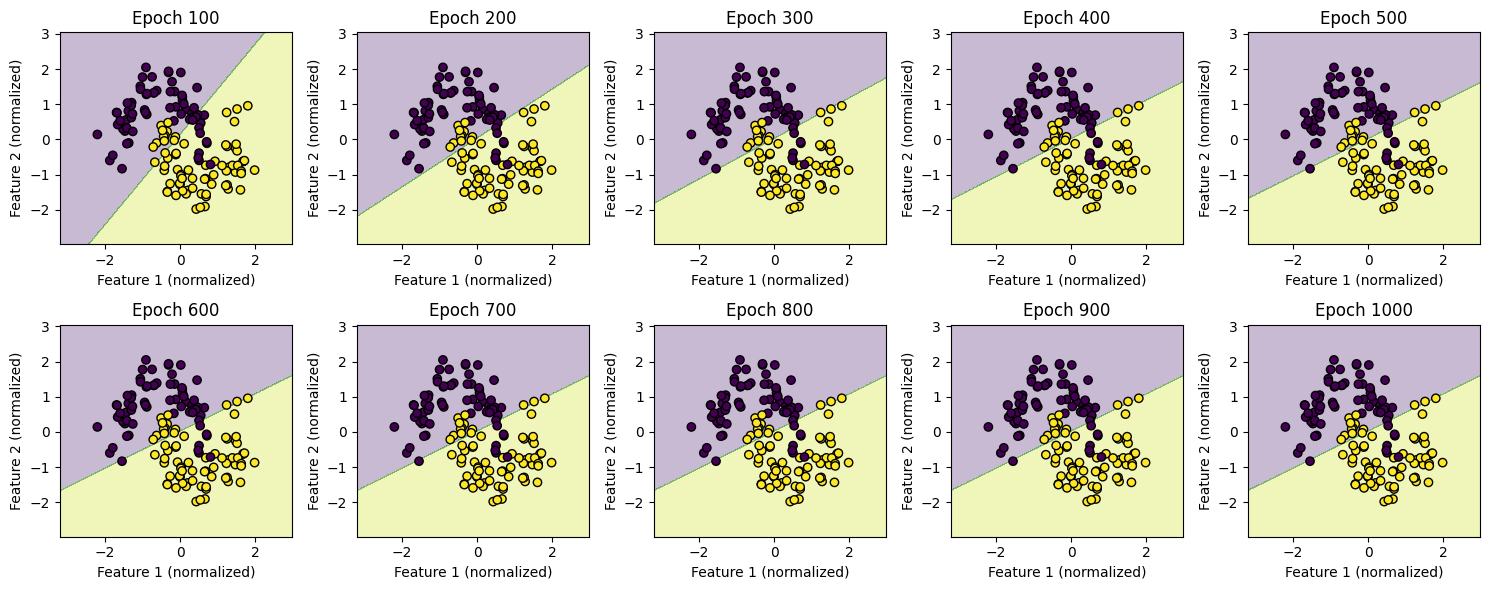

Test Accuracy: 82.50%
Test Recall: 72.22%


In [ ]:
class Adaline(nn.Module):
    def __init__(self):
        super(Adaline, self).__init__()
        self.fc = nn.Linear(2, 1)  

    def forward(self, x):
        return self.fc(x)  

def plot_decision_boundary(X, y, model, ax, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid).detach().numpy()
    Z = (Z > 0.5).astype(int) 
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Feature 1 (normalized)')
    ax.set_ylabel('Feature 2 (normalized)')
    ax.set_title(f'Epoch {epoch}')

def train_and_plot(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor, epochs=1000):
    train_loss, val_loss = [], []  
    model = Adaline()
    criterion = nn.MSELoss()  
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for epoch in range(epochs):
        model.train()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor).squeeze()
            val_loss_value = criterion(val_outputs, y_val_tensor.float()).item()
            val_loss.append(val_loss_value)

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss_value:.4f}')
            plot_decision_boundary(X_train_tensor.numpy(), y_train_tensor.numpy(), model, axes[(epoch + 1) // 100 - 1], epoch + 1)

    plt.tight_layout()
    plt.show()

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        test_predictions = (test_outputs > 0.6).float()
        
        accuracy = accuracy_score(y_test_tensor, test_predictions)
        recall = recall_score(y_test_tensor, test_predictions)
        print(f'Test Accuracy: {accuracy * 100:.2f}%')
        print(f'Test Recall: {recall * 100:.2f}%')

    return train_loss, val_loss 

train_loss, val_loss = train_and_plot(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor)

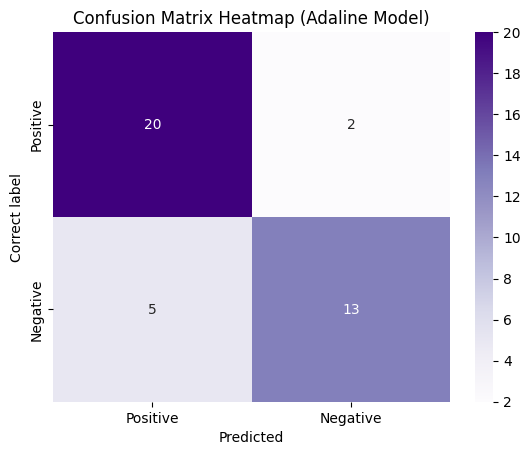

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()  
    test_predictions = (test_outputs > 0.6).float()  
  
    conf_matrix_2 = confusion_matrix(y_test_tensor.numpy(), test_predictions.numpy())

    sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Purples", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.title("Confusion Matrix Heatmap (Adaline Model)")
    plt.xlabel("Predicted")
    plt.ylabel("Correct label")
    plt.show()

# Proposed methods for classifying nonlinear data:

i. SVM

Test Accuracy: 92.50%
Test Recall: 94.44%


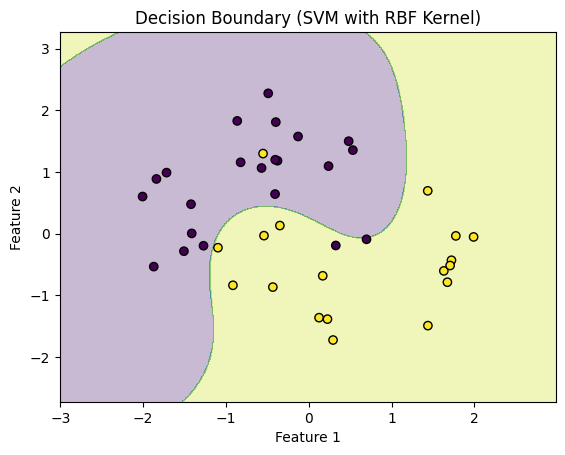

In [ ]:
model = SVC(kernel='rbf', gamma='scale', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')

def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test, y_test, model, "Decision Boundary (SVM with RBF Kernel)")

ii. MLP

Epoch [0/200], Loss: 0.7520, Val Loss: 0.7429, Val Accuracy: 0.4000
Epoch [10/200], Loss: 0.5730, Val Loss: 0.5857, Val Accuracy: 0.7500
Epoch [20/200], Loss: 0.3889, Val Loss: 0.4646, Val Accuracy: 0.7500
Epoch [30/200], Loss: 0.2876, Val Loss: 0.5166, Val Accuracy: 0.7500
Epoch [40/200], Loss: 0.2816, Val Loss: 0.5817, Val Accuracy: 0.7500
Epoch [50/200], Loss: 0.2679, Val Loss: 0.4935, Val Accuracy: 0.7500
Epoch [60/200], Loss: 0.2610, Val Loss: 0.4460, Val Accuracy: 0.7500
Epoch [70/200], Loss: 0.2548, Val Loss: 0.4442, Val Accuracy: 0.7500
Epoch [80/200], Loss: 0.2486, Val Loss: 0.4365, Val Accuracy: 0.7500
Epoch [90/200], Loss: 0.2432, Val Loss: 0.4315, Val Accuracy: 0.7500
Epoch [100/200], Loss: 0.2376, Val Loss: 0.4173, Val Accuracy: 0.7500
Epoch [110/200], Loss: 0.2309, Val Loss: 0.4098, Val Accuracy: 0.7500
Epoch [120/200], Loss: 0.2190, Val Loss: 0.4073, Val Accuracy: 0.8000
Epoch [130/200], Loss: 0.2007, Val Loss: 0.3510, Val Accuracy: 0.8000
Epoch [140/200], Loss: 0.1716, 

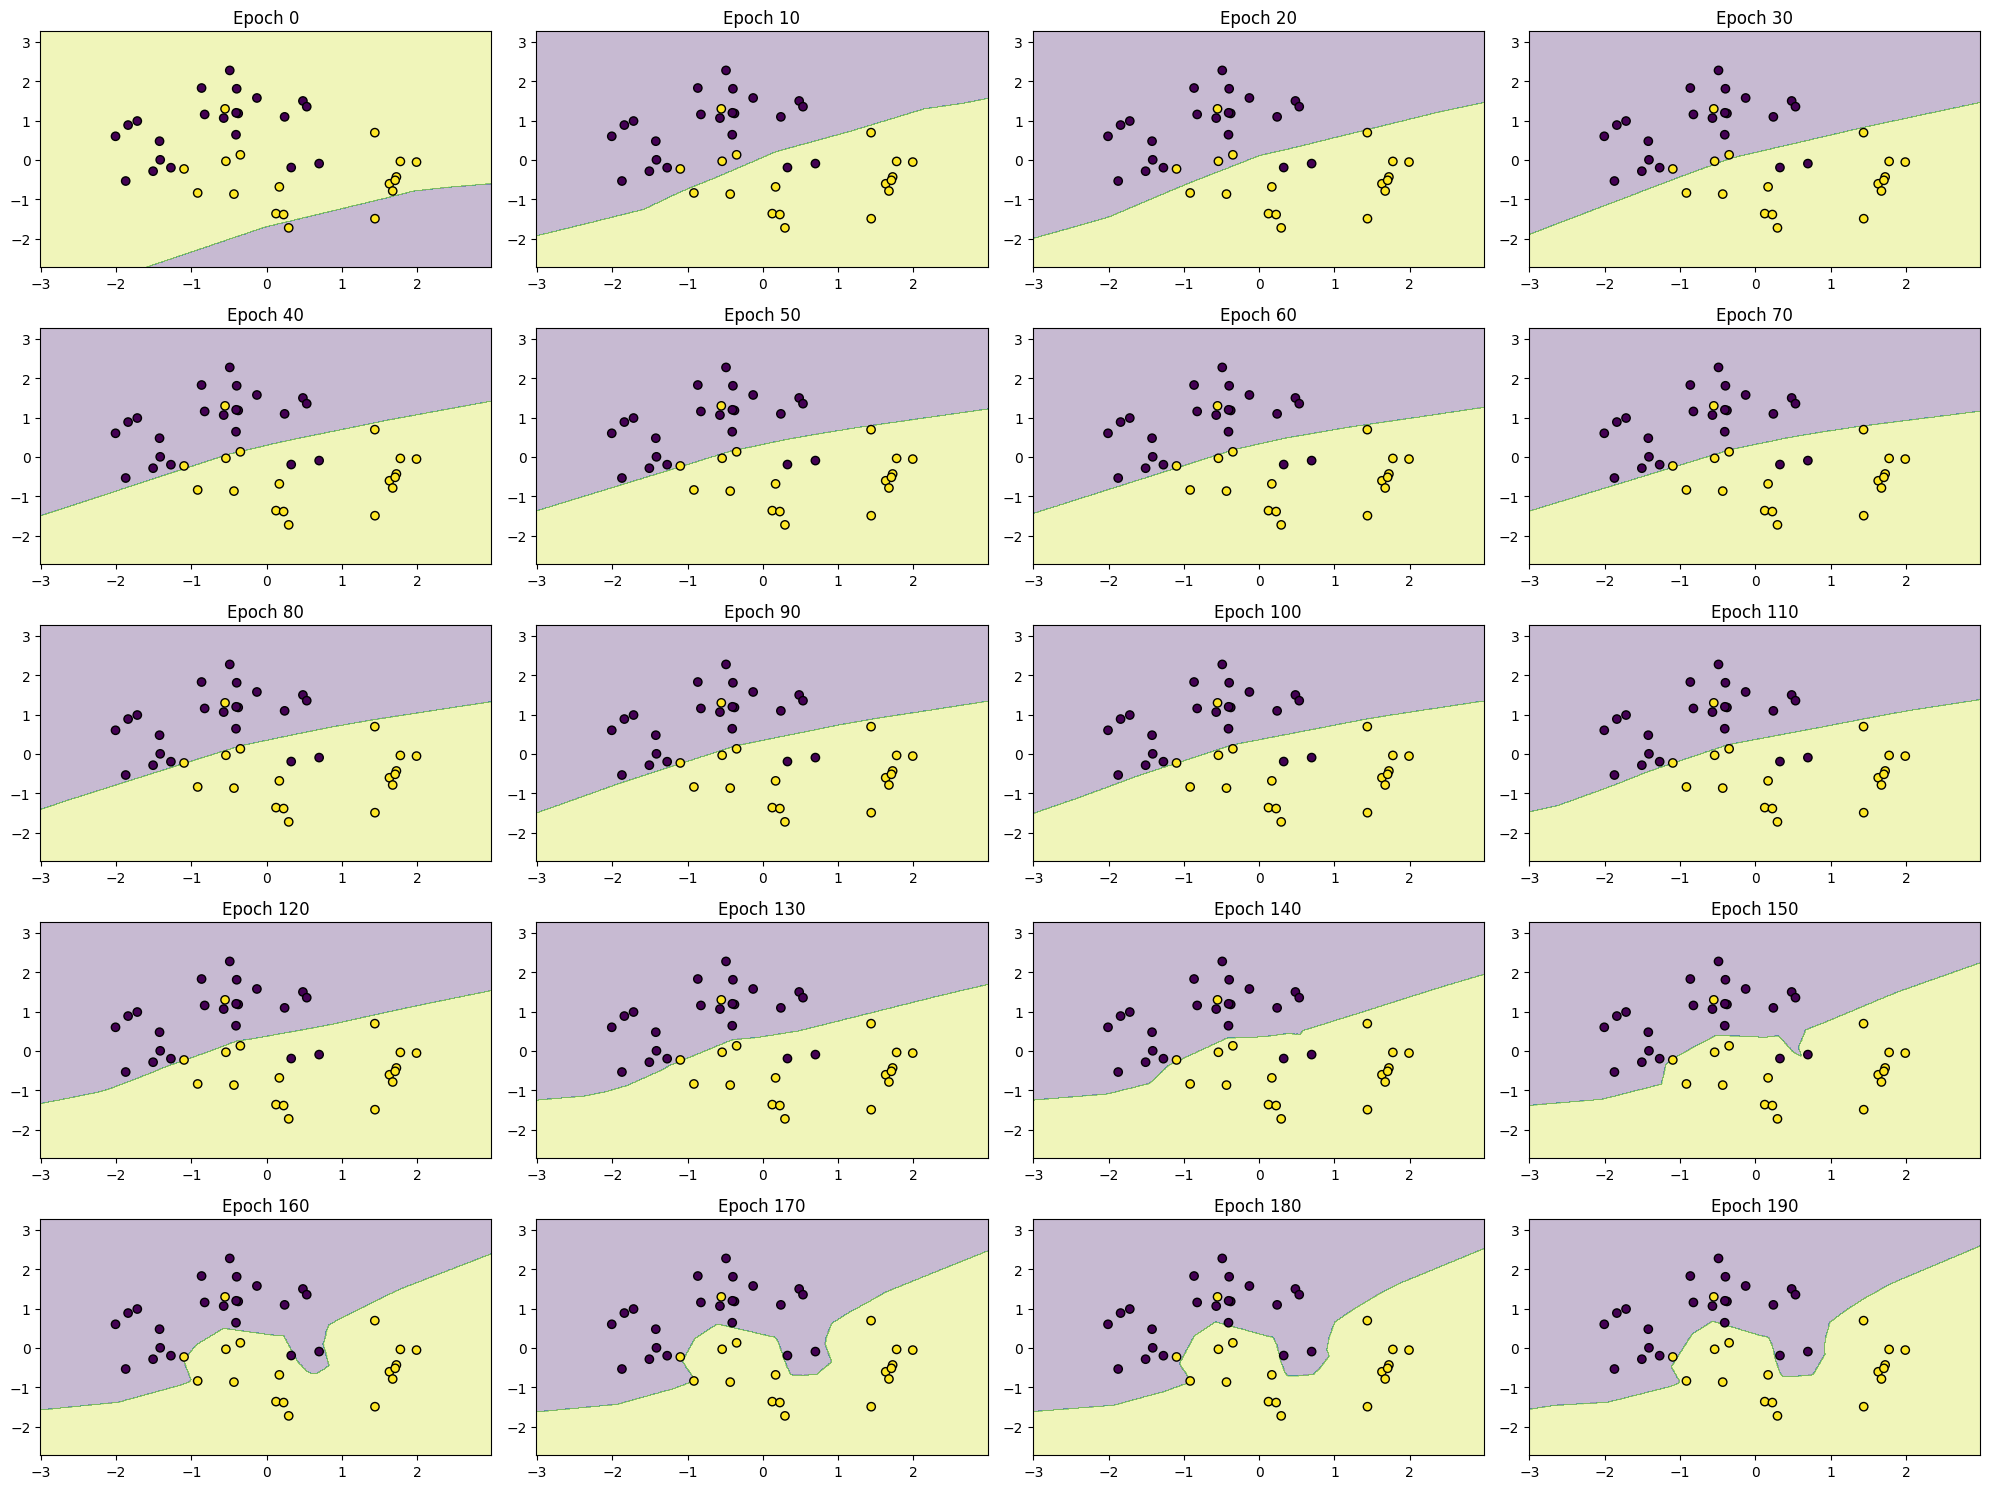

Test Accuracy: 95.00%


tensor(0.9500)

In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)  
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val)  
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)  

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(2, 10)  
        self.hidden2 = nn.Linear(10, 10)  
        self.output = nn.Linear(10, 2)  

    def forward(self, x):
        x = torch.relu(self.hidden1(x))  
        x = torch.relu(self.hidden2(x))  
        x = self.output(x)  
        return x

def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

def train_model(model, optimizer, criterion, X_train, y_train, X_val, y_val, epochs=200):
    fig, axes = plt.subplots(5, 4, figsize=(20, 15))  
    axes = axes.ravel()  

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            val_preds = torch.argmax(val_output, dim=1)
            val_accuracy = (val_preds == y_val).float().mean()

        if epoch % 10 == 0:  
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')
            
            if epoch // 10 < len(axes):  
                plot_decision_boundary(X_test_tensor.numpy(), y_test_tensor.numpy(), model, f'Epoch {epoch}', axes[epoch // 10])

    plt.tight_layout()  
    plt.show()

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        preds = torch.argmax(output, dim=1)
        accuracy = (preds == y_test).float().mean()
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    return accuracy

model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs=200)
evaluate_model(model, X_test_tensor, y_test_tensor)